In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#grab csv file 
df = pd.read_csv("cookie_cats.csv")

In [3]:
#check the head. 
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
#check info for missing data, seems like everything is non-null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
# we can probably AB test on version, as there seems to be exactly two of them.
df['version'].nunique()

2

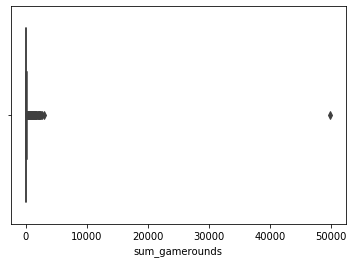

In [9]:
sns.boxplot(df['sum_gamerounds'])

In [10]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [11]:
df_counter = df.groupby('sum_gamerounds')['userid'].count()

In [12]:
df_counter

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

Text(0.5, 0, '# rounds')

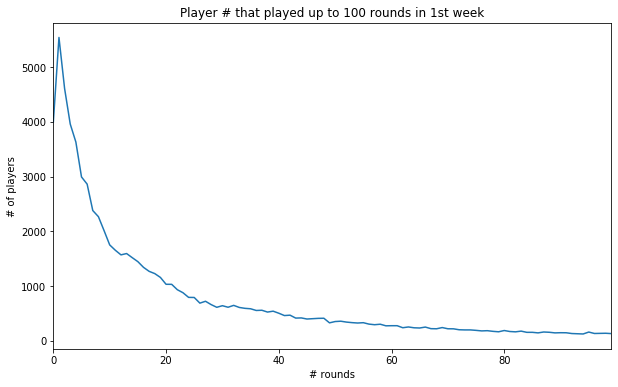

In [18]:
plot = df_counter[:100].plot(figsize =( 10,6))
plot.set_title('Player # that played up to 100 rounds in 1st week')
plot.set_ylabel("# of players")
plot.set_xlabel('# rounds')

In [19]:
df['retention_1'].sum() / df['retention_1'].count()

0.4452095044850259

In [21]:
#gate 30 seems to do slightly better than gate 40 on 1 day retention
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

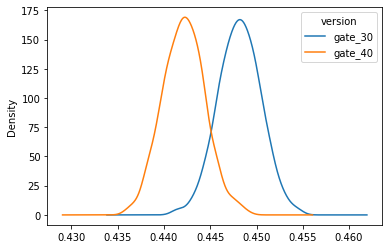

In [23]:
#checking the two versions on a density plot
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1, replace =True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)

boot_1d.plot(kind='density')


In [24]:
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/ boot_1d.gate_40*100

probability that 1-day retention is greater when gate = 30: 0.967


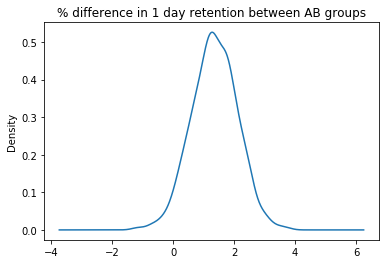

In [25]:
plot1 = boot_1d['diff'].plot(kind='density')
plot1.set_title('% difference in 1 day retention between AB groups')
print('probability that 1-day retention is greater when gate = 30:',(boot_1d['diff'] > 0).mean())

In [26]:
#the difference is much larger for 7 day retention, gate 30 is much better.
df.groupby('version')['retention_7'].sum()/df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

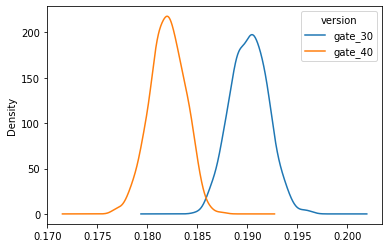

In [28]:
#same plot as before but for 7 days
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac = 1, replace =True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)

boot_7d.plot(kind='density')

In [29]:
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/ boot_7d.gate_40*100

probability that 7-day retention is greater when gate = 30: 0.967


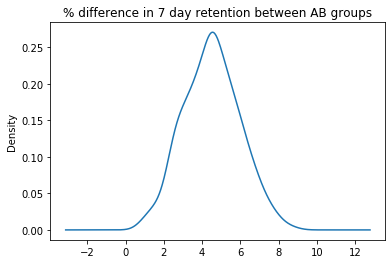

In [30]:
plot2 = boot_7d['diff'].plot(kind='density')
plot2.set_title('% difference in 7 day retention between AB groups')
print('probability that 7-day retention is greater when gate = 30:',(boot_1d['diff'] > 0).mean())

# Seems like for both 7 day and 1 day retention, gate-30 is better than gate-40. While the difference isn't so big in 1 day, the difference is quite large in 7 day, so keeping gate-30 is better than using gate-40. 